In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
df=pd.read_csv("E-commerce Customer Behavior.csv")

In [56]:
df.head()

,Customer ID,Age,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Satisfaction Level
0,101,29,Gold,1120.20,14,4.6,True,Satisfied
1,102,34,Silver,780.50,11,4.1,False,Neutral
2,103,43,Bronze,510.75,9,3.4,True,Unsatisfied
3,104,30,Gold,1480.30,19,4.7,False,Satisfied
4,105,27,Silver,720.40,13,4.0,True,Unsatisfied


In [57]:
df.shape

(350, 8)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer ID         350 non-null    int64  
 1   Age                 350 non-null    int64  
 2   Membership Type     350 non-null    object 
 3   Total Spend         350 non-null    float64
 4   Items Purchased     350 non-null    int64  
 5   Average Rating      350 non-null    float64
 6   Discount Applied    350 non-null    bool   
 7   Satisfaction Level  348 non-null    object 
dtypes: bool(1), float64(2), int64(3), object(2)
memory usage: 19.6+ KB


### Column Types

- **Numerical** - Customer ID, Age, Total Spend, Item Purchased, Average Rating
- **Categorical** - Membership Type, Discount Applied, Satisfaction Level

In [59]:
df.describe()  #dirty data statistics

,Customer ID,Age,Total Spend,Items Purchased,Average Rating
count,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.500000,33.597143,845.381714,12.600000,4.019143
std,101.180532,4.870882,362.058695,4.155984,0.580539
min,101.000000,26.000000,410.800000,7.000000,3.000000
25%,188.250000,30.000000,502.000000,9.000000,3.500000
50%,275.500000,32.500000,775.200000,12.000000,4.100000
75%,362.750000,37.000000,1160.600000,15.000000,4.500000
max,450.000000,43.000000,1520.100000,21.000000,4.900000


## Analysing Categorical Columns To Check for Inconsistencies

In [60]:
df['Membership Type'].value_counts()

,count
Membership Type,
Silver,117
Bronze,116
Gold,114
gold,3


In [61]:
df['Membership Type'] = df['Membership Type'].str.strip().str.title()   # Standardizing the 'Membership Type' column

In [62]:
df['Membership Type'].value_counts()  # Verify the counts after fixing

,count
Membership Type,
Gold,117
Silver,117
Bronze,116


In [63]:
df['Discount Applied'].value_counts()

,count
Discount Applied,
True,175
False,175


In [64]:
df['Satisfaction Level'].value_counts()

,count
Satisfaction Level,
Satisfied,125
Unsatisfied,116
Neutral,107


## Handling Missing Values

### Checking number and percentage of missing values in columns

In [65]:
missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100
missing_counts=missing_counts[missing_counts>0]
print(missing_counts)
missing_percent = missing_percent[missing_percent>0]
print(missing_percent)

Satisfaction Level    2
dtype: int64
Satisfaction Level    0.571429
dtype: float64


We now need to get rid of missing values from the database.

### Replacing Missing Values (By Imputation)

In [66]:
missing_mask = df["Satisfaction Level"].isna()

df.loc[missing_mask, "Satisfaction Level"] = np.where(
    df.loc[missing_mask, "Average Rating"] >= 4.5, "Satisfied",
    np.where(df.loc[missing_mask, "Average Rating"] >= 3.5, "Neutral", "Unsatisfied")
)

In [67]:
missing_counts = df.isna().sum()
missing_counts

,0
Customer ID,0
Age,0
Membership Type,0
Total Spend,0
Items Purchased,0
Average Rating,0
Discount Applied,0
Satisfaction Level,0


## Handling Duplicate Values

In [68]:
df.duplicated().sum()

0

In [69]:
df

,Customer ID,Age,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Satisfaction Level
0,101,29,Gold,1120.20,14,4.6,True,Satisfied
1,102,34,Silver,780.50,11,4.1,False,Neutral
2,103,43,Bronze,510.75,9,3.4,True,Unsatisfied
3,104,30,Gold,1480.30,19,4.7,False,Satisfied
4,105,27,Silver,720.40,13,4.0,True,Unsatisfied
...,...,...,...,...,...,...,...,...
345,446,32,Silver,660.30,10,3.8,True,Unsatisfied
346,447,36,Bronze,470.50,8,3.0,False,Neutral
347,448,30,Gold,1190.80,16,4.5,True,Satisfied
348,449,34,Silver,780.20,11,4.2,False,Neutral


# Univariate Analysis On Numerical Columns
### (Outlier Handling Included)

1. **Age**

In [70]:
df['Age'].describe()

,Age
count,350.000000
mean,33.597143
std,4.870882
min,26.000000
25%,30.000000
50%,32.500000
75%,37.000000
max,43.000000


<Axes: ylabel='Frequency'>

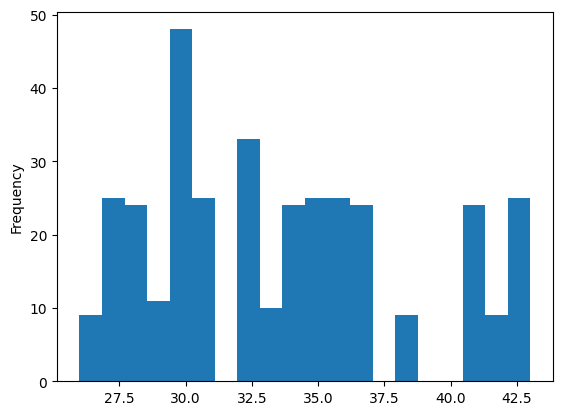

In [71]:
df['Age'].plot(kind='hist',bins=20)

<Axes: ylabel='Density'>

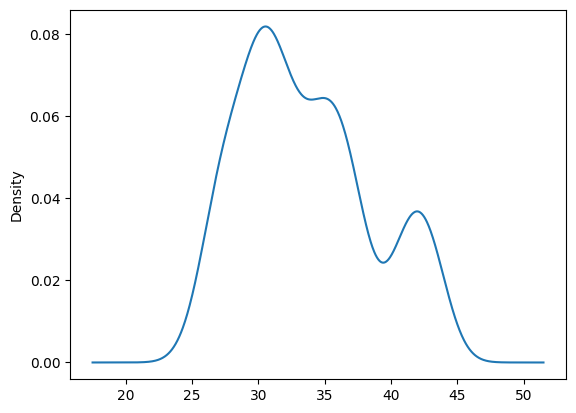

In [72]:
df['Age'].plot(kind='kde')

In [73]:
df['Age'].skew()

0.4683401217720541

<Axes: >

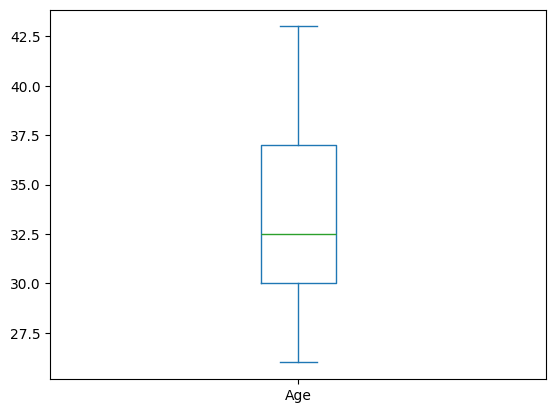

In [75]:
df['Age'].plot(kind='box')  #no outliers observed

**Conclusions**
*   Age is slightly positively skewed (right-skewed) but still fairly close to a normal distribution.
*   None of the values were missing in the original dataset.
*   No outliers were observed.
*   People in their late 20s/early 30s are more likely to buy.






2. **Total Spend**

In [76]:
df['Total Spend'].describe()

,Total Spend
count,350.000000
mean,845.381714
std,362.058695
min,410.800000
25%,502.000000
50%,775.200000
75%,1160.600000
max,1520.100000


<Axes: ylabel='Frequency'>

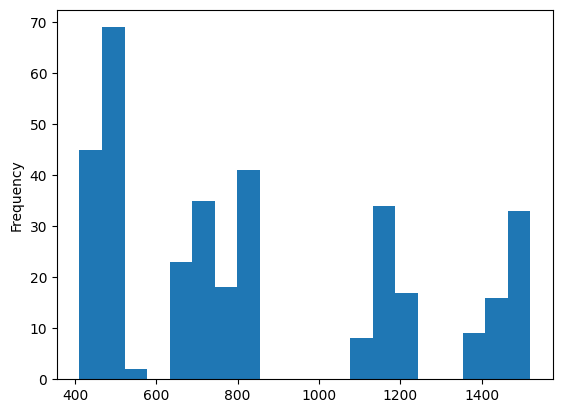

In [77]:
df['Total Spend'].plot(kind='hist',bins=20)

<Axes: ylabel='Density'>

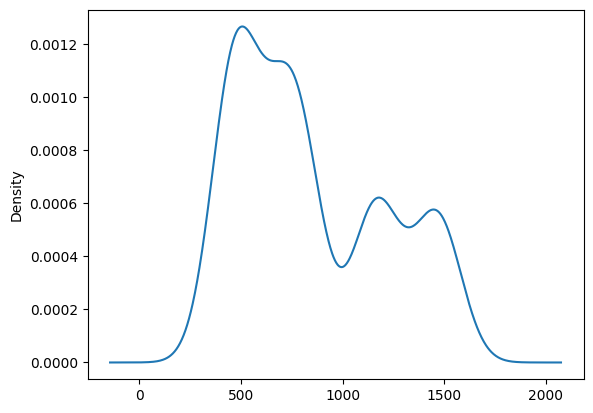

In [78]:
df['Total Spend'].plot(kind='kde')

In [79]:
df['Total Spend'].skew()

0.5625665916317646

<Axes: >

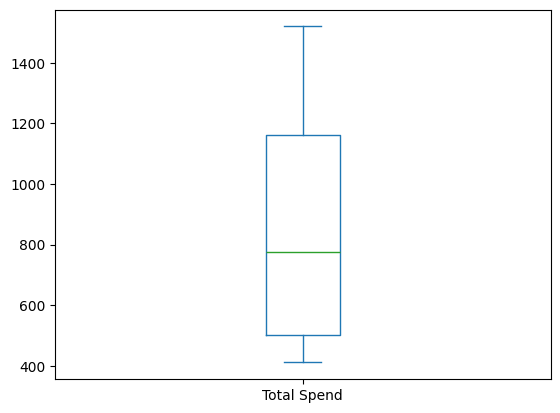

In [80]:
df['Total Spend'].plot(kind='box')  #No outliers

**Conclusions**
*   Total Spend is moderately positively skewed (right-skewed) but still relatively close to being symmetric.
*   None of the values were missing in the original dataset.
*   No outliers were observed.
*   Most of the buyers spend 500 units for the purchases.



3. **Items Purchased**

In [81]:
df['Items Purchased'].describe()

,Items Purchased
count,350.000000
mean,12.600000
std,4.155984
min,7.000000
25%,9.000000
50%,12.000000
75%,15.000000
max,21.000000


<Axes: ylabel='Frequency'>

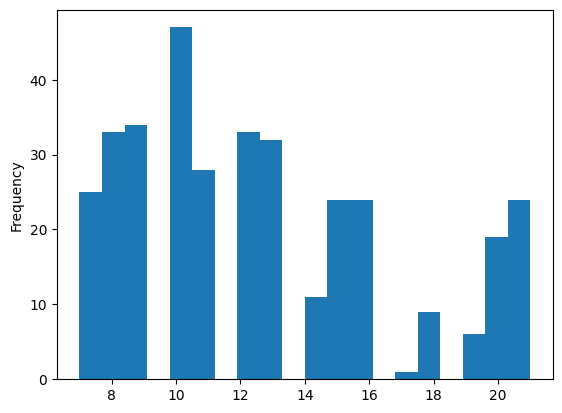

In [82]:
df['Items Purchased'].plot(kind='hist',bins=20)

<Axes: ylabel='Density'>

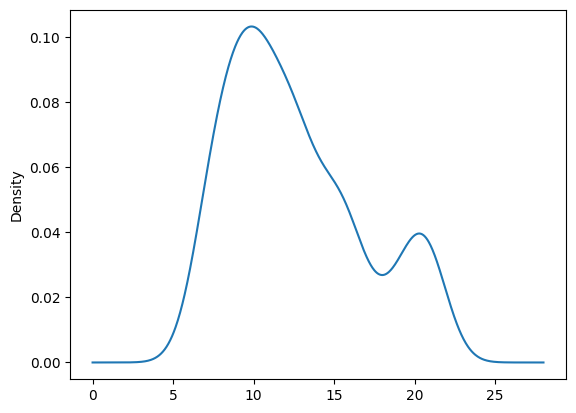

In [83]:
df['Items Purchased'].plot(kind='kde')

In [84]:
df['Items Purchased'].skew()

0.6491598755535916

<Axes: >

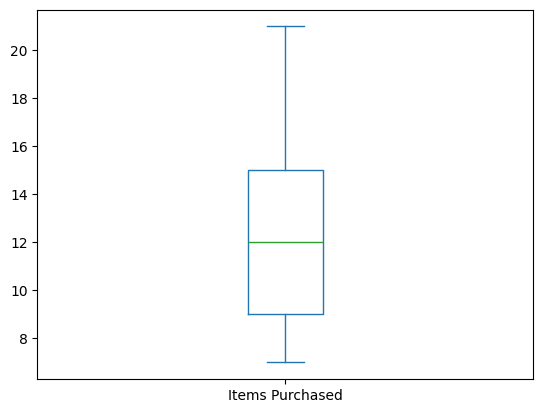

In [86]:
df['Items Purchased'].plot(kind='box')  #No outliers

**Conclusions**
*   Items Purchased is moderately positively skewed (right-skewed) but still fairly close to being normal.
*   None of the values were missing in the original dataset.
*   No outliers were observed.
*   most of the buyers buy around 10 items.



4. **Average Rating**

In [88]:
df['Average Rating'].describe()

,Average Rating
count,350.000000
mean,4.019143
std,0.580539
min,3.000000
25%,3.500000
50%,4.100000
75%,4.500000
max,4.900000


<Axes: ylabel='Frequency'>

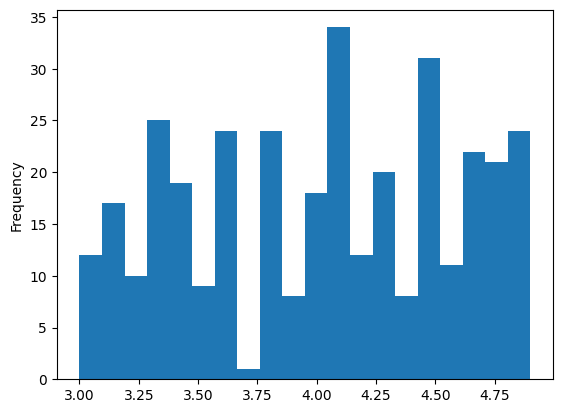

In [87]:
df['Average Rating'].plot(kind='hist',bins=20)

<Axes: ylabel='Density'>

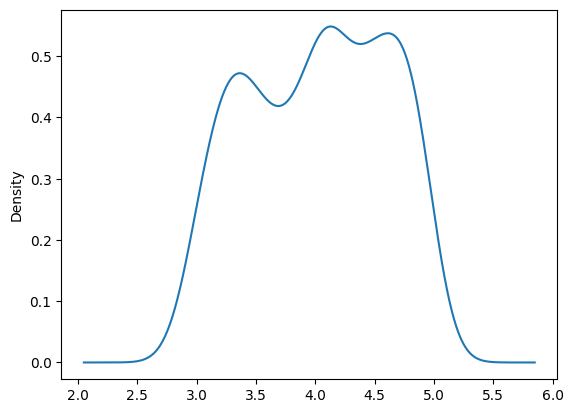

In [89]:
df['Average Rating'].plot(kind='kde')

In [90]:
df['Average Rating'].skew()

-0.12682024184919624

<Axes: >

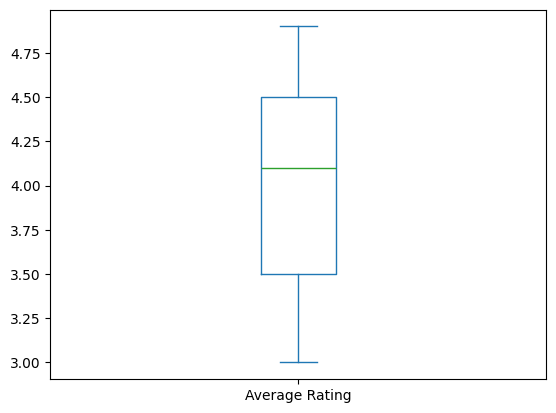

In [91]:
df['Average Rating'].plot(kind='box')   #No outlier

**Conclusions**
*   Items Purchased is is slightly left-skewed (negatively skewed) but is very close to being symmetrical.
*   None of the values were missing in the original dataset.
*   No outliers were observed.
*   Most of the customers rate their shopping experience above 3.0.


# Univariate Analysis On Numerical Columns

1. **Membership Type**

In [92]:
df['Membership Type'].value_counts()

,count
Membership Type,
Gold,117
Silver,117
Bronze,116


<Axes: xlabel='Membership Type'>

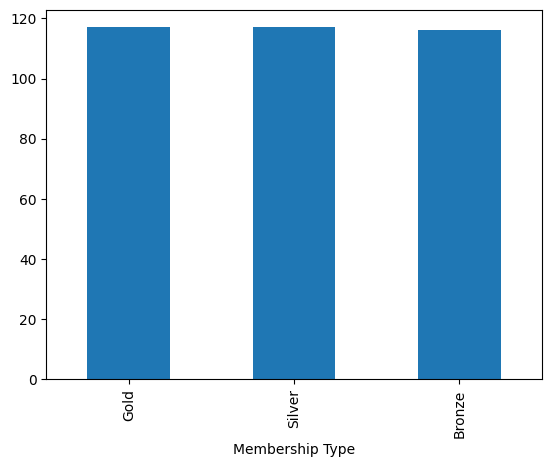

In [93]:
df['Membership Type'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

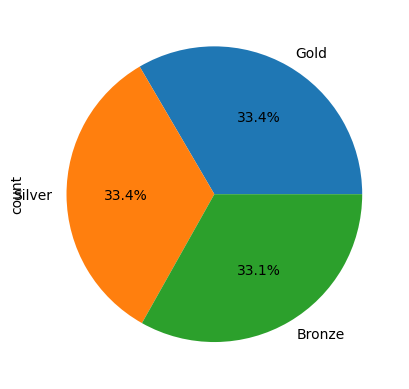

In [94]:
df['Membership Type'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: xlabel='Membership Type'>

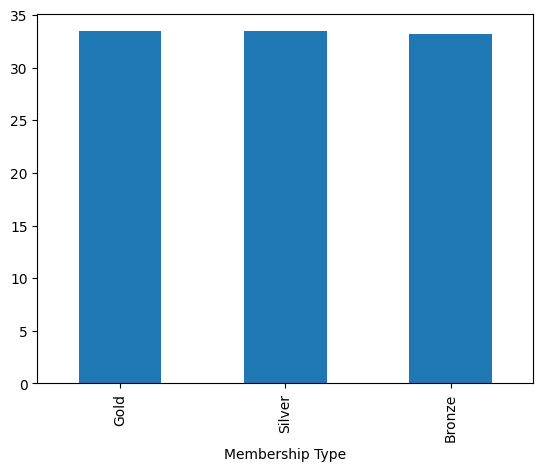

In [95]:
freq_percentage = df['Membership Type'].value_counts(normalize=True) * 100
freq_percentage.plot(kind='bar')

**Conclusion:**
Customers are equally likely to choose any one of the three types of memberships.

2. **Discount Applied**

In [96]:
df['Discount Applied'].value_counts()

,count
Discount Applied,
True,175
False,175


<Axes: xlabel='Discount Applied'>

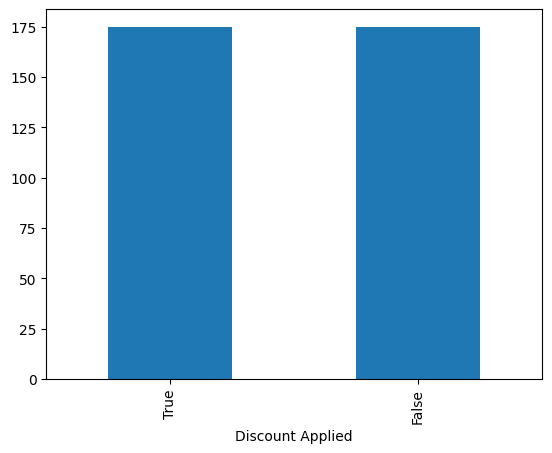

In [97]:
df['Discount Applied'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

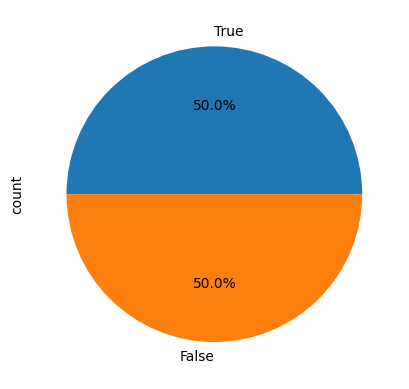

In [98]:
df['Discount Applied'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: xlabel='Discount Applied'>

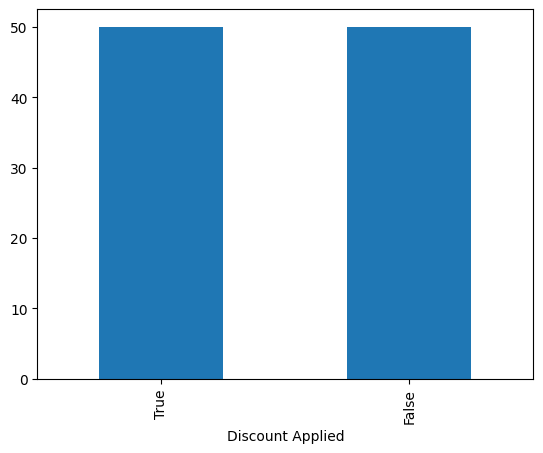

In [99]:
freq_percentage = df['Discount Applied'].value_counts(normalize=True) * 100
freq_percentage.plot(kind='bar')

**Conclusion:**
Customers choosing to apply or not apply discounts are equally likely.

3. **Satisfaction Level**

In [100]:
df['Satisfaction Level'].value_counts()

,count
Satisfaction Level,
Satisfied,125
Unsatisfied,118
Neutral,107


<Axes: xlabel='Satisfaction Level'>

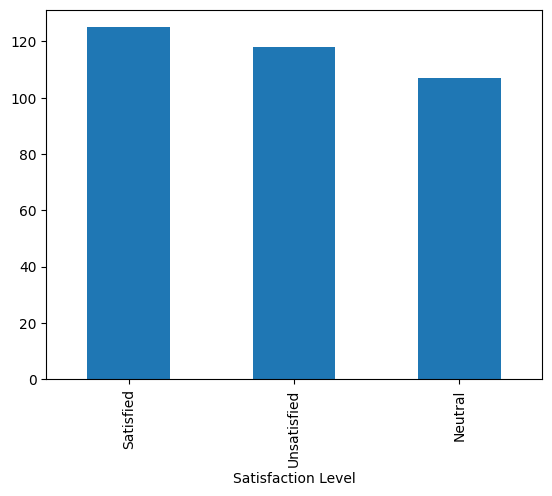

In [101]:
df['Satisfaction Level'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

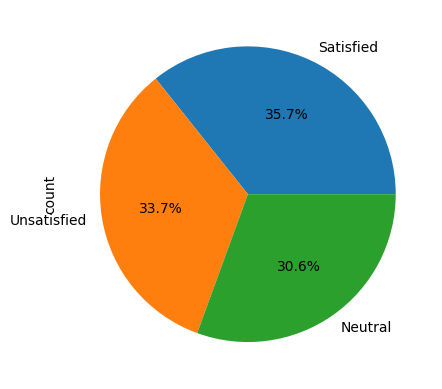

In [102]:
df['Satisfaction Level'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: xlabel='Satisfaction Level'>

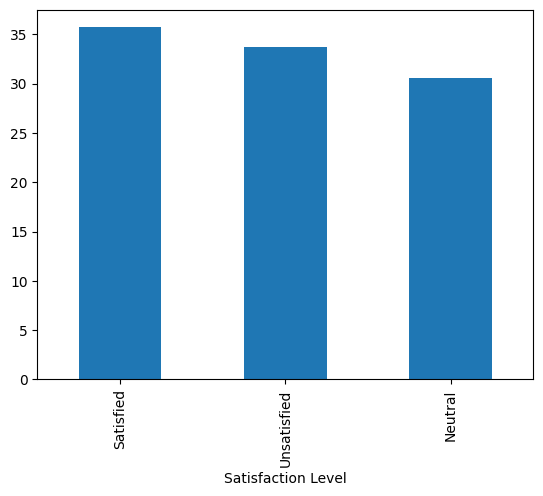

In [103]:
freq_percentage = df['Satisfaction Level'].value_counts(normalize=True) * 100
freq_percentage.plot(kind='bar')

**Conclusion:**
Customers are more probable to be satisfied by the purchase, even though number of unsatisfied and neutral customers are comparable to those satisfied.

# Bivariate Analysis

In [104]:
df

,Customer ID,Age,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Satisfaction Level
0,101,29,Gold,1120.20,14,4.6,True,Satisfied
1,102,34,Silver,780.50,11,4.1,False,Neutral
2,103,43,Bronze,510.75,9,3.4,True,Unsatisfied
3,104,30,Gold,1480.30,19,4.7,False,Satisfied
4,105,27,Silver,720.40,13,4.0,True,Unsatisfied
...,...,...,...,...,...,...,...,...
345,446,32,Silver,660.30,10,3.8,True,Unsatisfied
346,447,36,Bronze,470.50,8,3.0,False,Neutral
347,448,30,Gold,1190.80,16,4.5,True,Satisfied
348,449,34,Silver,780.20,11,4.2,False,Neutral


<ipython-input-105-0067de1522a3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(


<Axes: xlabel='Membership Type', ylabel='Age'>

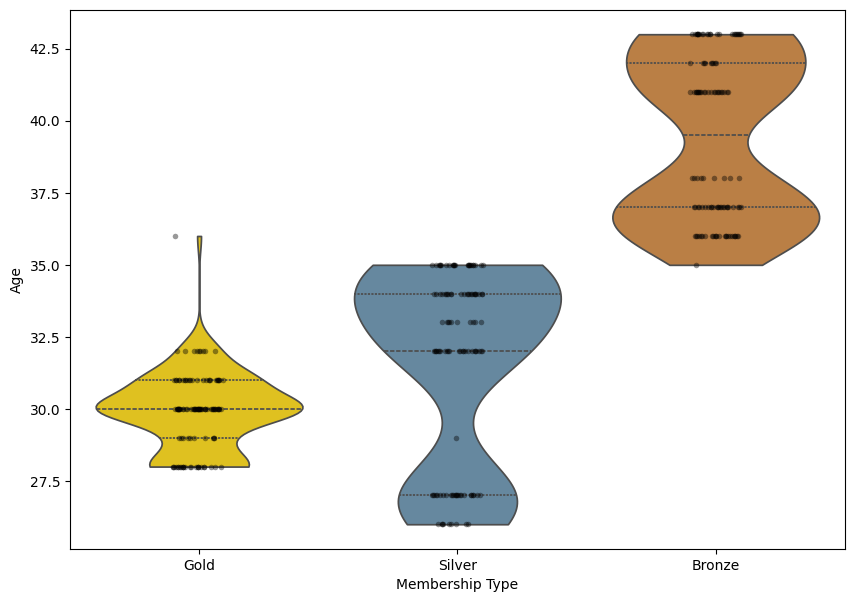

In [105]:
plt.figure(figsize=(10, 7))

ax = sns.violinplot(
    x='Membership Type',
    y='Age',
    data=df,
    palette={
        'Gold': '#FFD700',
        'Silver': '#5D8AA8',
        'Bronze': '#CD7F32'
    },
    inner='quartile',
    cut=0
)


sns.stripplot(
    x='Membership Type',
    y='Age',
    data=df,
    color='black',
    alpha=0.4,
    jitter=True,
    size=4
)

Here, we can visualize that younger people tend to have a higher level of membership.

<ipython-input-106-236864e2598f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Membership Type", y="Total Spend", data=df, palette="Set2", errorbar=None)


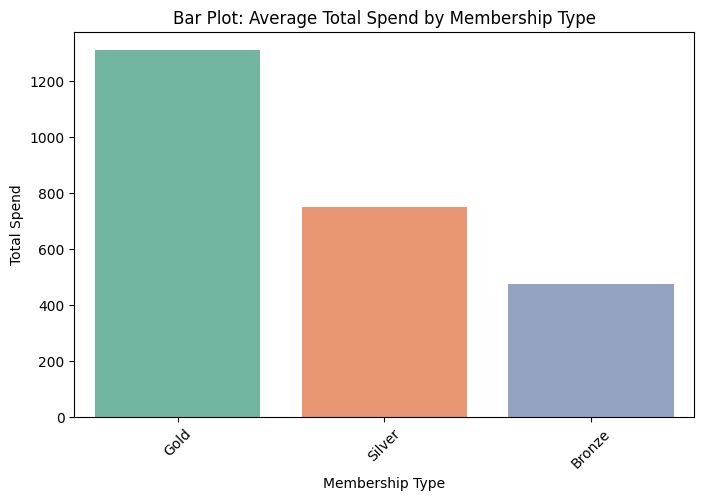

In [106]:
plt.figure(figsize=(8, 5))
sns.barplot(x="Membership Type", y="Total Spend", data=df, palette="Set2", errorbar=None)
plt.title("Bar Plot: Average Total Spend by Membership Type")
plt.xlabel("Membership Type")
plt.ylabel("Total Spend")
plt.xticks(rotation=45)
plt.show()

As expected, customers with gold membership tend to spend more than the other membership levels.

<ipython-input-107-efea4ae0e78a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Satisfaction Level", y="Total Spend", data=df, palette="muted")


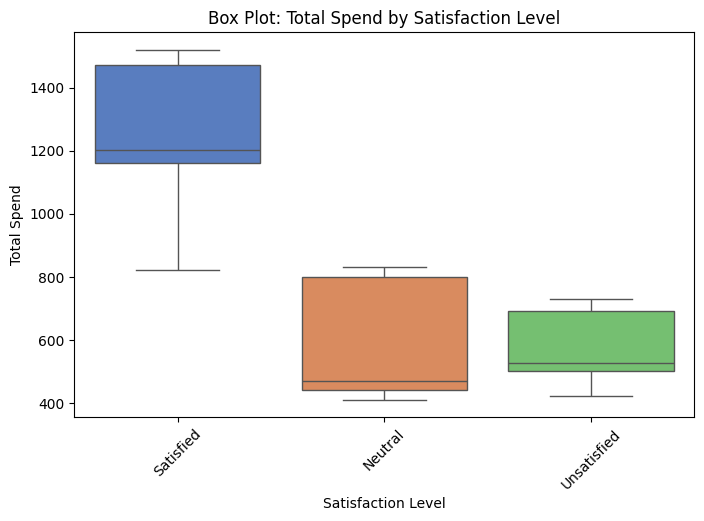

In [107]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Satisfaction Level", y="Total Spend", data=df, palette="muted")
plt.title("Box Plot: Total Spend by Satisfaction Level")
plt.xlabel("Satisfaction Level")
plt.ylabel("Total Spend")
plt.xticks(rotation=45)
plt.show()

As expected, customers who are more satisfied tend to spend higher than the neutral/unsatisfied customers.

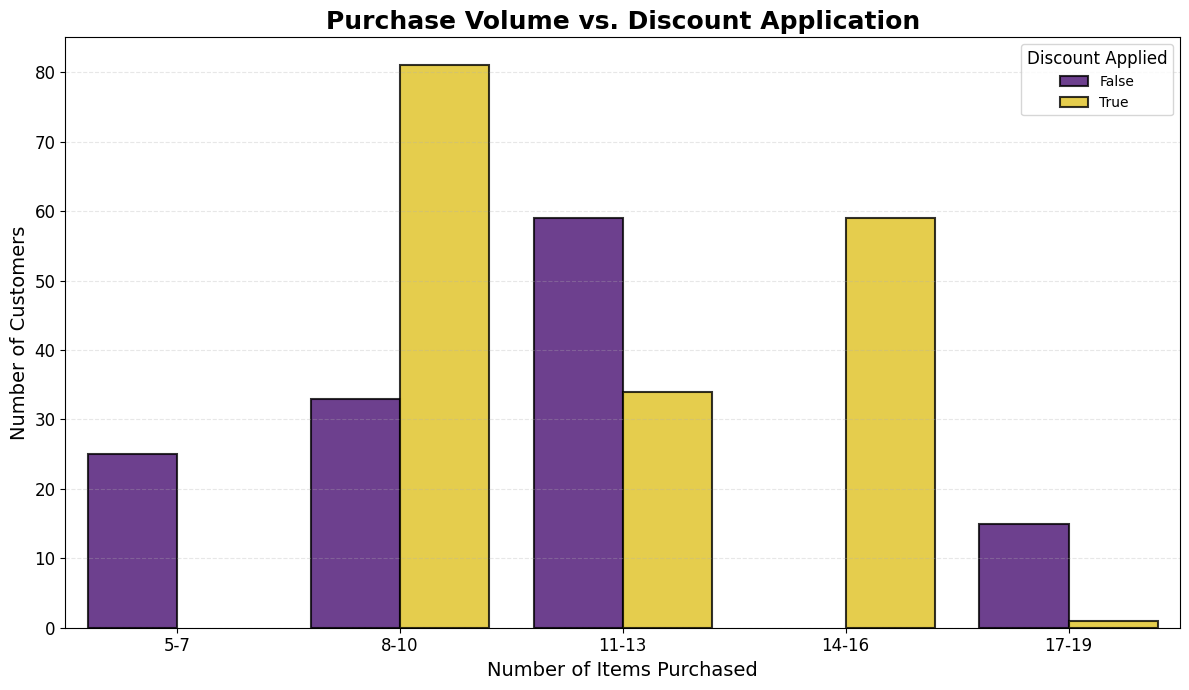

In [108]:
bins = [5, 8, 11, 14, 17, 20]
labels = ['5-7', '8-10', '11-13', '14-16', '17-19']
df['Purchase Bin'] = pd.cut(df['Items Purchased'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(12, 7))

# Create the grouped bar chart
ax = sns.countplot(
    x='Purchase Bin',
    hue='Discount Applied',
    data=df,
    palette={
        True: '#FFD700',   # Gold for discount applied
        False: '#4B0082'   # Deep purple for no discount
    },
    edgecolor='black',
    linewidth=1.5,
    alpha=0.8
)

# Customize appearance
plt.title('Purchase Volume vs. Discount Application', fontsize=18, fontweight='bold')
plt.xlabel('Number of Items Purchased', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.legend(title='Discount Applied', title_fontsize=12)



# Styling touches
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

No discount purchases are usually consisting of lesser number of items, with lesser customers undertaking those purchases, while more customers tend to buy more items when sold at a discounted price.

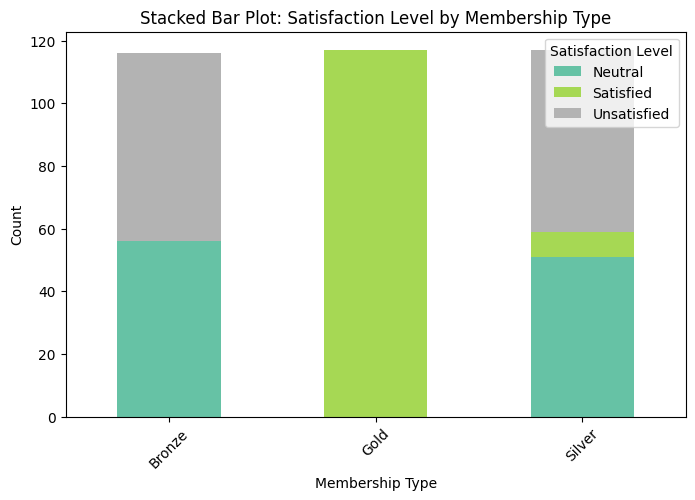

In [109]:
df_grouped = df.groupby(["Membership Type", "Satisfaction Level"]).size().unstack()

df_grouped.plot(kind="bar", stacked=True, colormap="Set2", figsize=(8, 5))

plt.title("Stacked Bar Plot: Satisfaction Level by Membership Type")
plt.xlabel("Membership Type")
plt.ylabel("Count")
plt.legend(title="Satisfaction Level")
plt.xticks(rotation=45)
plt.show()

Number of people satisfied with their purchases increase as their membership level increases, highest number of satisfied customers being Gold members while none having Bronze membership being fully satisfied.

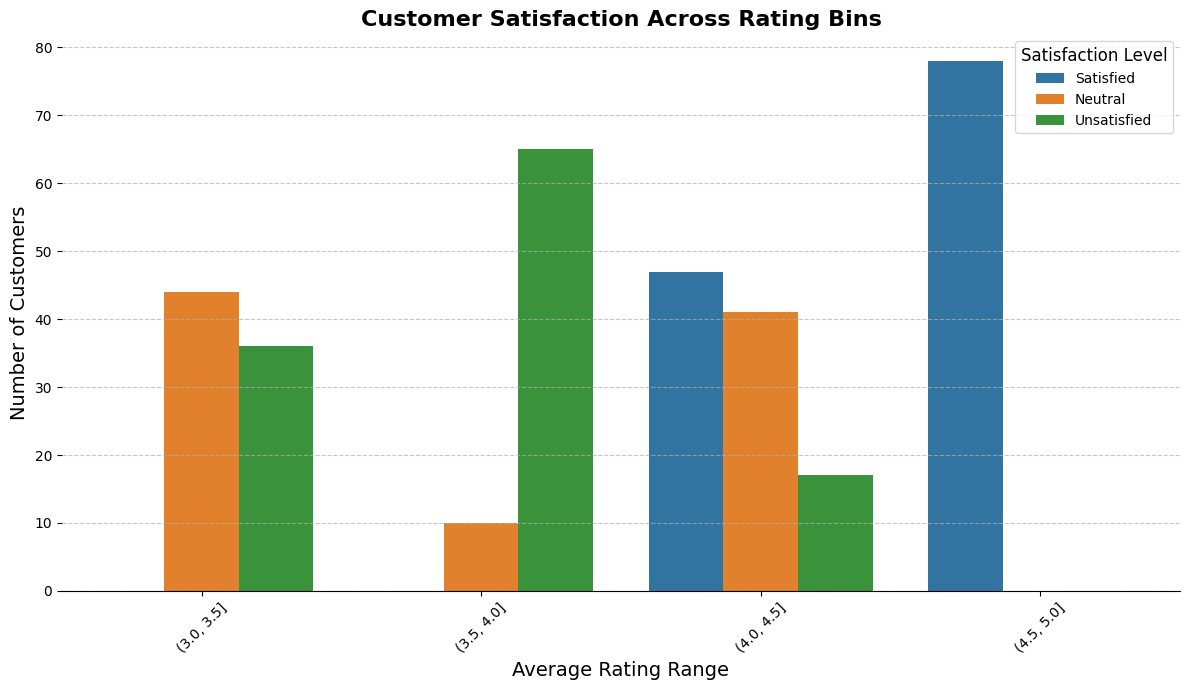

In [110]:
df['Rating Bin'] = pd.cut(df['Average Rating'], bins=np.arange(3.0, 5.1, 0.5))

plt.figure(figsize=(12, 7))

ax = sns.countplot(
    x='Rating Bin',
    hue='Satisfaction Level',
    data=df
)

plt.title('Customer Satisfaction Across Rating Bins', fontsize=16, fontweight='bold')
plt.xlabel('Average Rating Range', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.legend(title='Satisfaction Level', title_fontsize=12)

plt.xticks(rotation=45)

sns.despine(left=True)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

This should come to no surprise as customers giving higher ratings tend to be more satisfied.

# Multivariate Analysis

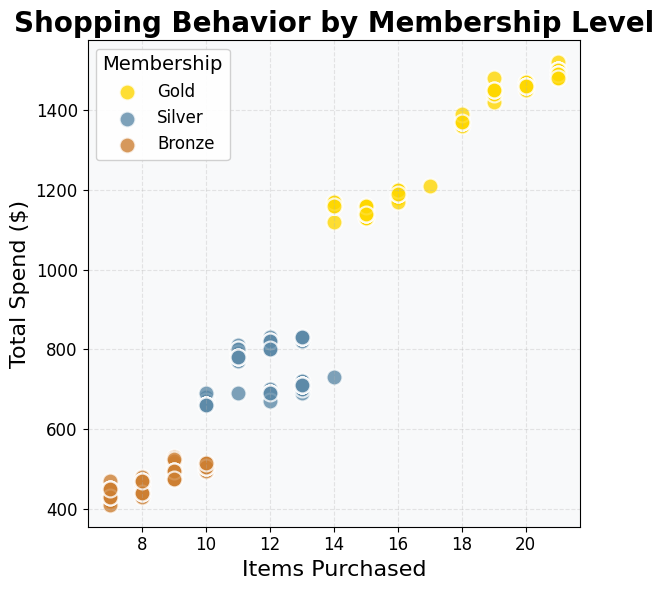

In [111]:
vibrant_colors = {
    'Gold': '#FFD700',
        'Silver': '#5D8AA8',
        'Bronze': '#CD7F32'
}


plt.figure(figsize=(6,6))


for membership, color in vibrant_colors.items():
    subset = df[df['Membership Type'] == membership]
    plt.scatter(
        subset['Items Purchased'],
        subset['Total Spend'],
        c=color,
        label=membership,
        s=130,
        alpha=0.8,
        edgecolor='white',
        linewidth=1.5
    )


plt.title('Shopping Behavior by Membership Level', fontsize=20, fontweight='bold')
plt.xlabel('Items Purchased', fontsize=16)
plt.ylabel('Total Spend ($)', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.3)


plt.legend(title='Membership', title_fontsize=14, fontsize=12,
           loc='upper left', framealpha=0.9)


plt.gca().set_facecolor('#f8f9fa')


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

Here, we can visualize that people with a higher level of membership tend to spend and purchase more items.

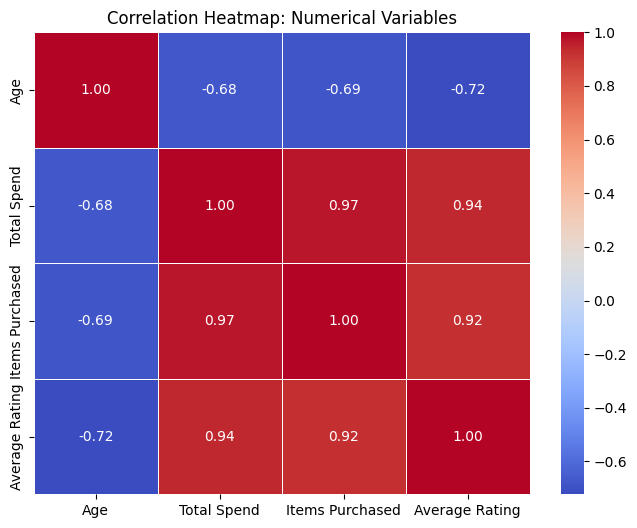

In [112]:
from pandas.plotting import scatter_matrix
correlation_matrix=df[['Age','Total Spend','Items Purchased','Average Rating']].corr()
correlation_matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap: Numerical Variables')
plt.show()

Items purchased and total spend have a highly positive correlation (0.97).

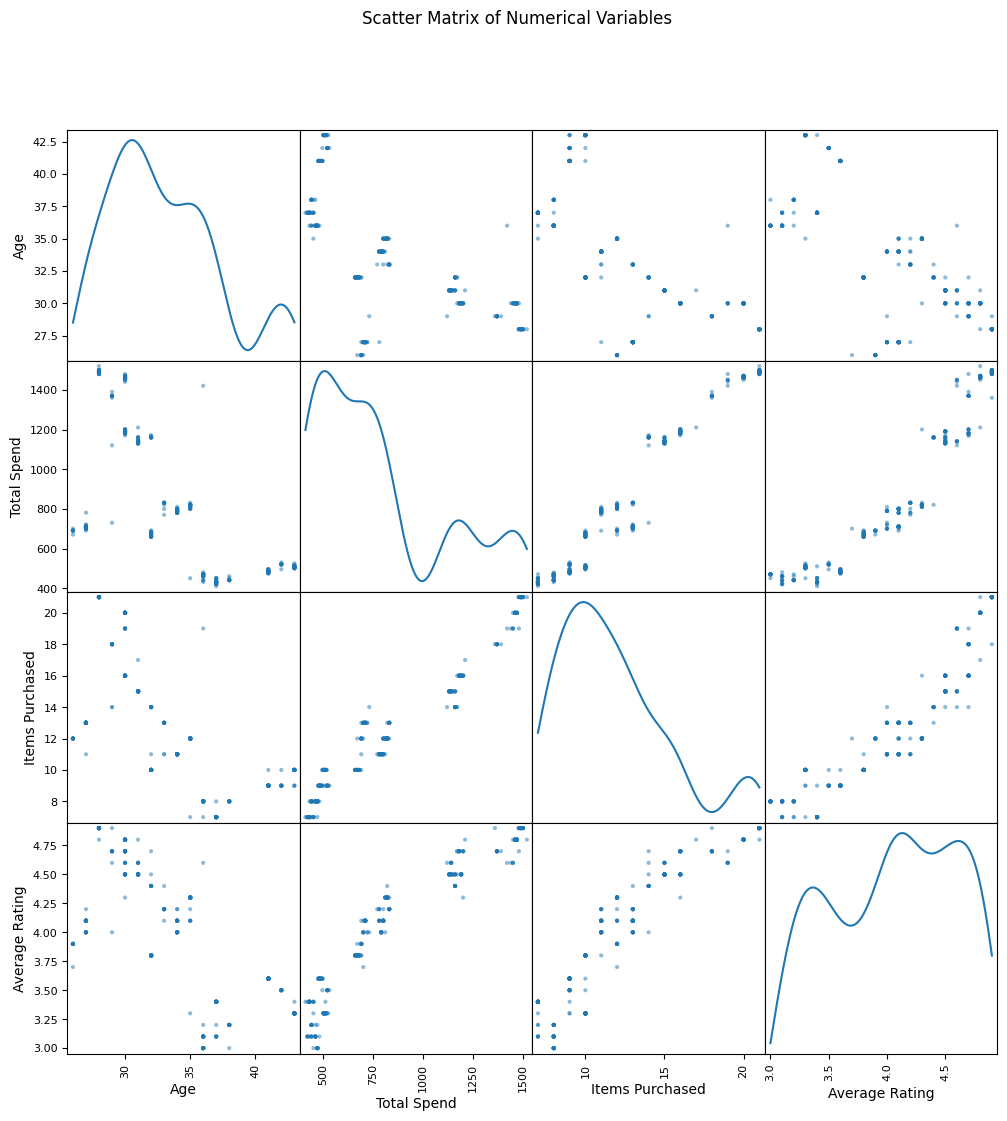

In [113]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[['Age','Total Spend','Items Purchased','Average Rating']], figsize=(12, 12), diagonal='kde')
plt.suptitle('Scatter Matrix of Numerical Variables')
plt.show()

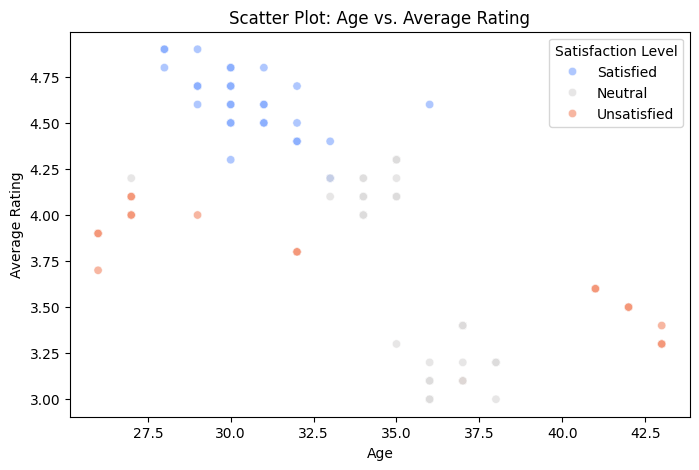

In [114]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Age"], y=df["Average Rating"], hue=df["Satisfaction Level"], alpha=0.7, palette="coolwarm")
plt.title("Scatter Plot: Age vs. Average Rating")
plt.xlabel("Age")
plt.ylabel("Average Rating")
plt.legend(title="Satisfaction Level")
plt.show()

Buyers in their late 20s/early 30s are more likely to give higher ratings and hence be more satisfied, while late 30s buyers are more likely to be neutral. Early 20s/40+ aged buyers are likely to be dissatisfied with the purchases.